In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
import scipy

In [11]:
f = 'E-Mu-Proteus-2-Electric-Guitar-C4.wav'
samplerate, data = wavfile.read(f)

C:\Users\k_dys\AppData\Local\Temp\ipykernel_10604\197367087.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(f)


In [12]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate)
adata = data[:,0]

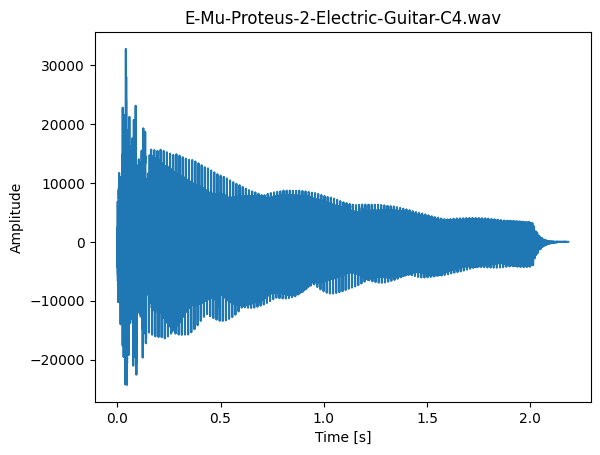

In [13]:
plt.plot(time, adata)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('E-Mu-Proteus-2-Electric-Guitar-C4.wav')
plt.show()

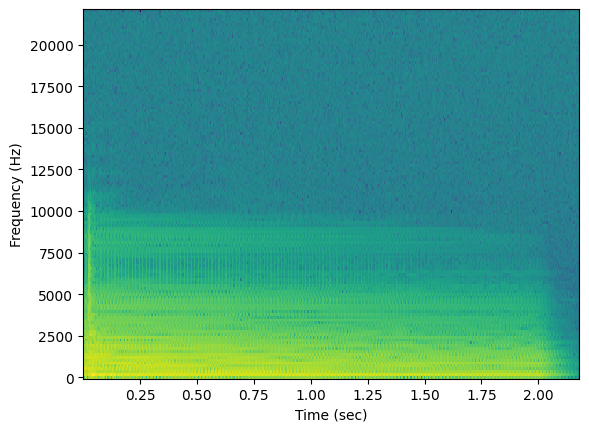

In [14]:
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()


In [23]:
def freq_to_mel(freq):
    return 1125.0 * np.log(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (np.exp(mels / 1125.0) - 1.0)

In [19]:
def get_filter_points(fmin, fmax, mel_filter_count, data_size, sample_rate=44100):
    
    mels = np.linspace(freq_to_mel(fmin), freq_to_mel(fmax), num=mel_filter_count+2)
    freqs = met_to_freq(mels)
    
    return np.floor((data_size + 1) / sample_rate * freqs).astype(int), freqs

In [17]:
print(len(data))

96333


In [25]:
def hm(f,k, m):
    if k<f[m-1]:
        return 0
    elif f[m-1]<=k and k<f[m]:
        return (k-f[m-1])/(f[m]-f[m-1])
    elif f[m]<=k and k<=f[m+1]:
        return (k-f[m])/(f[m+1]-f[m])
    return 0

In [53]:
min_freq = 0
max_freq = samplerate/2
mel_filter_count = 20

In [77]:
points,freqs = get_filter_points(min_freq, max_freq, mel_filter_count, len(data), samplerate)
print(points)

[    0   275   601   985  1438  1973  2605  3350  4230  5269  6494  7941
  9649 11664 14043 16851 20165 24077 28693 34143 40575 48167]


In [26]:
print(hm(points,10000,3))

0.4102115244347192


In [78]:
ft_data = scipy.fft.fft(adata)

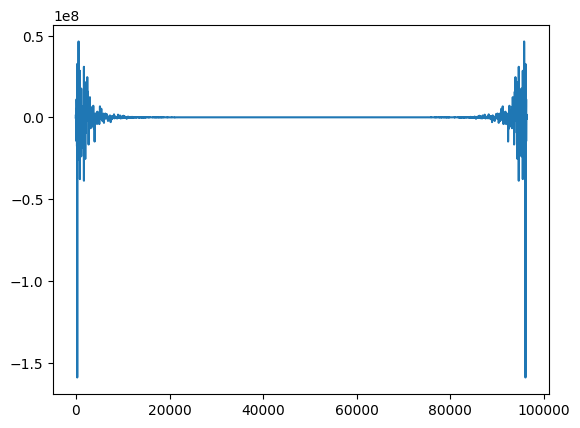

In [73]:
plt.plot(ft_data)

In [79]:
s = []
for m in range(1, mel_filter_count+1):
    summ = 0
    for k in range(len(ft_data)-1):
        summ+=np.abs(ft_data[k])**2*hm(points, k, m)
    s.append(np.log(summ))
print(s)

[37.15433939416267, 36.85364408473224, 36.19722651543046, 36.161182659124336, 36.18749421699569, 35.89723662150245, 35.39807639593038, 34.696774028743945, 33.598987864422874, 32.82657906619054, 31.890014708905817, 31.26551670261198, 30.306452958599277, 28.995711836493026, 28.041699650966986, 26.961633367153794, 23.77296536864783, 19.71704503617199, 20.05011534211354, 20.309661767775978]


In [80]:
cn = []
print()
for n in range(mel_filter_count):
    summ = 0
    for m in range(mel_filter_count):
        summ+=s[m]*np.cos(np.pi*n*(m+1/2)/mel_filter_count)
    cn.append(summ)


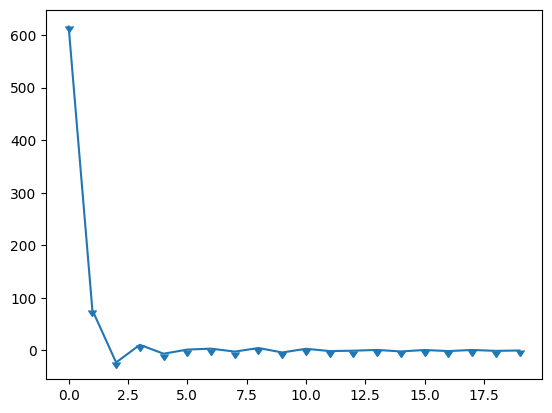

In [82]:
plt.plot(cn,marker=matplotlib.markers.CARETDOWNBASE)

In [43]:
import librosa

In [47]:
mfccs = librosa.feature.mfcc(y = adata.astype(float), sr = samplerate, n_mfcc = 10)

In [52]:
print(len(mfccs))

10
